## Programming Assignment 1: Implementing the Discrete Event Simulator


* Maticulation Number: 3736064
* Github repo: https://github.com/ankitk50/AMS/tree/master


### Answers to 'Analysis and General Questions'

#### 1.6.1: Confidence

To be sure/confident about our results, the simulation can be run over and over again and some statistical paramters such as _mean number of dropped packets_, _variance of dropped packets_ can be calculated. 

For example if the _no. of packets dropped_ in simulation is close to the mean value of dropped packets obtained over a 1000 simulations, we know the no. of dropped packets are correct and hence obtain confidence. This phenomenon is also stated by law of large number in probibility theory.

**Reference:** In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed.(source: Wikepedia)

#### 1.6.2 Event Chain Structure

Heap is better for implementation of a **priority queue** because of the fact that the root of the heap always has either the minimum value(_**min heap**--our case_) or the maximum value(_**max heap**_) in the heap. This makes things like popping and pushing items in the queue quite easy and error free.

Apart from this, since heap is a form of binary tree, sorting time complexity of a heap in $O(n\log{}n)$. The python implementation of heapq.heapify() function has time complexity of  $O(\log{}n)$.

Hence, other data structures like stack, python list can also be used, but they might not be the most efficient and convinient solutions for priority queues.

#### 1.6.3 Update Event Chain

If we do event insertion at the beginning of simulation following problems will be there. The simulation will not be close to the real system in which packets arrive in a random fashion. Reasons are:
   * Customer arrival events should load Service completion event only when the the packet has been loaded to server. This would not be possible when all events are loaded at once. Because we would not know which CA event should trigger which SC event and hence we cannot estimate completion time for SC event.
   * Similarly, the service completion events should trigger another service completion event once the packet from queue has been added to server. The time reference for next event is done based this event which would not be possible if we load every thing at once.
   * The serving time in real scenarios is usaually random, depending upon the packet size, CPU utilisation etc. We cannot simulate this scenario by loading all events at once.
  
    

### Answers to Simulation Study

#### 1.7.1: Queue Length Determination I

I just brute forced the queue vlaue by starting the queue length at 1 and then incrementing the queue length by +1 after the 1000 simulations (total runs) when the no. of dropped packets are more than 10 for 80% of the total runs.

In [1]:
import part1_simstudy as ps
import matplotlib.pyplot as plt


Cofiguration: 
1. Simulation time = 100s
2. MAX_DROPPED = 10
3. NO_OF_RUNS = 1000

In [7]:
print('Task 1 Queue Length:',ps.task_1_7_1()[0])

Task 1 Queue Length: 3


#### 1.7.2: Queue Length Determination II

Cofiguration 1: 
1. Simulation time = 1000s
2. MAX_DROPPED     = 100
3. NO_OF_RUNS      =100

In [6]:
print(' Task 2 Queue Length:',ps.task_1_7_2()[0])

 Task 2 Queue Length: 4


Cofiguration 1.2 (**just increasing the simulation time in task 1**): 
1. Simulation time = 1000s (increased from 100s to 1000s )
2. MAX_DROPPED     = 10
3. NO_OF_RUNS      =1000

As shown below when we increase the simulation time, by keeping the MAX_DROPPED as same, we get higher queue length. The queue length is increased from 3 --> 43 when we change run time from 

In [4]:
print('Queue Length:',ps.task_1_7_1(sim_t=1000000)[0])

Queue Length: 43


#### 1.7.3: Comparison of results

#### Plot- Block probabity vs Queue length (Task 1 and Task 2)

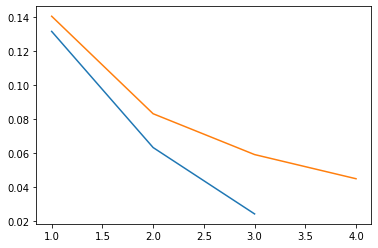

In [11]:
#task1 data
data=[(q_len+1, block_prob) for q_len, block_prob in enumerate(ps.task_1_7_1()[2])]

x_val1=[x[0] for x in data]
y_val1=[y[1] for y in data]

#task2 data
data2= [(q_len+1, block_prob) for q_len, block_prob in enumerate(ps.task_1_7_2()[2])]
x_val2=[x[0] for x in data2]
y_val2=[y[1] for y in data2]

plt.plot(x_val1,y_val1)
plt.plot(x_val2,y_val2)